In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
%pylab inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()
from sklearn import metrics
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Populating the interactive namespace from numpy and matplotlib


<Figure size 720x540 with 0 Axes>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%cd "/content/gdrive/My Drive/Colab Notebooks/Credit Card Spend Prediction Problem - Banking Regression"

/content/gdrive/My Drive/Colab Notebooks/Credit Card Spend Prediction Problem - Banking Regression


# Reading and Pre-Processing Data

In [0]:
df_credit_user_data = pd.read_excel('CREDIT CARD USERS DATA.xlsx')

In [0]:
credit_user_data = df_credit_user_data[df_credit_user_data.columns]

In [0]:
credit_user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 132 entries, custid to response_03
dtypes: float64(31), int64(99), object(2)
memory usage: 5.0+ MB


In [0]:
credit_user_data.shape

(5000, 132)

In [0]:
credit_user_data.head(5)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,...,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,...,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,...,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,...,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,...,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,...,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


In [0]:
# Droping custid as it is not usefull
credit_user_data.drop('custid',axis=1,inplace=True)

In [0]:
# totalcardspent = cardspent + card2spent
credit_user_data['totalcardspent'] = credit_user_data['cardspent'] + credit_user_data['card2spent']

In [0]:
# Droping cardspent and card2spent
credit_user_data.drop(['cardspent', 'card2spent'],axis=1,inplace=True)

In [0]:
# Creating list of Categorical variables (provided in data dictionary)
cat_var_names=['region', 'townsize', 'gender', 'agecat', 'birthmonth', 'edcat', 'jobcat', 'union',
               'employ', 'empcat', 'retire', 'inccat', 'default', 'jobsat', 'marital', 'spousedcat',
               'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carcatvalue',
               'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle',
               'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk',
               'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote',
               'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 
               'card2type', 'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat', 'active',
               'bfast', 'churn', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice',
               'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'owntv',
               'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 
               'response_01', 'response_02', 'response_03']
print(cat_var_names)

['region', 'townsize', 'gender', 'agecat', 'birthmonth', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'inccat', 'default', 'jobsat', 'marital', 'spousedcat', 'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat', 'active', 'bfast', 'churn', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'owntv', 'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 'response_01', 'response_02', 'response_03']


In [0]:
# Creating list of Numerical variables (variables not in cat_var_names)
num_var_names = []
for col in credit_user_data.columns:
    if col not in cat_var_names:
        num_var_names.append(col)

print(num_var_names)

['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime', 'carditems', 'card2items', 'tenure', 'longmon', 'lnlongmon', 'longten', 'lnlongten', 'tollmon', 'lntollmon', 'tollten', 'lntollten', 'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wiremon', 'lnwiremon', 'wireten', 'lnwireten', 'hourstv', 'totalcardspent']


In [0]:
print(len(num_var_names))
print(len(cat_var_names))

46
84


## Handling Numerical data

In [0]:
credit_user_num_data = credit_user_data[num_var_names]

In [0]:
credit_user_num_data.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,carditems,card2items,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,totalcardspent
0,20,15,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,14.3,22.0,5,4,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.1,4.837075,14.25,2.656757,60.0,4.094345,0.00,NaN,0.00,NaN,13,149.46
1,22,17,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,6.8,29.0,5,2,39,8.90,2.186051,330.60,5.800909,0.0,NaN,0.00,NaN,54.85,4.004602,1975.0,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54
2,67,14,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,18.8,24.0,9,7,65,28.40,3.346389,1858.35,7.527444,0.0,NaN,0.00,NaN,0.00,NaN,0.0,NaN,23.00,3.135494,1410.0,7.251345,0.00,NaN,0.00,NaN,21,359.97
3,23,16,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,8.7,38.0,17,1,36,6.00,1.791759,199.45,5.295564,0.0,NaN,0.00,NaN,0.00,NaN,0.0,NaN,21.00,3.044522,685.0,6.529419,0.00,NaN,0.00,NaN,26,359.41
4,26,16,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,10.6,32.0,8,7,21,3.05,1.115142,74.10,4.305416,16.5,2.803360,387.70,5.960232,0.00,NaN,0.0,NaN,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83


In [0]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=credit_user_num_data.apply(lambda x: var_summary(x)).T
#num_summary.to_csv("num_summary.csv")
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,2.351280e+05,47.025600,47.000000,17.770338,3.157849e+02,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
ed,5000.0,0.0,7.271500e+04,14.543000,14.000000,3.281083,1.076550e+01,6.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,23.000000
income,5000.0,0.0,2.737980e+05,54.759600,38.000000,55.377511,3.066669e+03,9.000000,9.000000,13.000000,16.000000,24.000000,38.000000,67.000000,109.100000,147.000000,272.010000,1073.000000
lninc,5000.0,0.0,1.849955e+04,3.699909,3.637586,0.747072,5.581164e-01,2.197225,2.197225,2.564949,2.772589,3.178054,3.637586,4.204693,4.692261,4.990433,5.605839,6.978214
debtinc,5000.0,0.0,4.977080e+04,9.954160,8.800000,6.399783,4.095723e+01,0.000000,0.700000,1.900000,2.800000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,43.100000
creddebt,5000.0,0.0,9.286628e+03,1.857326,0.926437,3.415732,1.166722e+01,0.000000,0.033160,0.101088,0.175682,0.385520,0.926437,2.063820,4.299470,6.373010,14.280358,109.072596
lncreddebt,4999.0,1.0,-6.521372e+02,-0.130454,-0.076106,1.273058,1.620678e+00,-6.597334,-3.401690,-2.291604,-1.737842,-0.952685,-0.076106,0.724665,1.458625,1.852297,2.658910,4.692014
othdebt,5000.0,0.0,1.827230e+04,3.654460,2.098540,5.395172,2.910788e+01,0.000000,0.114299,0.287692,0.457997,0.980301,2.098540,4.314780,8.062046,11.815981,24.064260,141.459150
lnothdebt,4999.0,1.0,3.483879e+03,0.696915,0.741537,1.128578,1.273689e+00,-4.092107,-2.168241,-1.243483,-0.780312,-0.018987,0.741537,1.462053,2.087178,2.469586,3.180802,4.952011
spoused,5000.0,0.0,3.056400e+04,6.112800,-1.000000,7.743518,5.996207e+01,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14.000000,16.000000,18.000000,20.000000,24.000000


In [0]:
#Drop variables with high percentage of missing values
drop_num_column_list = ['lntollmon', 'lntollten', 'lnequipmon', 'lnequipten', 'lncardmon', 'lncardten', 'lnwiremon', 'lnwireten']
credit_user_num_data.drop(drop_num_column_list, axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
#Handling Outliers
def outlier_capping(x):
    x.clip(lower=x.quantile(0.01), upper=x.quantile(0.99), inplace=True)
    return x

credit_user_num_data=credit_user_num_data.apply(lambda x: outlier_capping(x))

In [0]:
#Handling missings
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

credit_user_num_data=credit_user_num_data.apply(lambda x: Missing_imputation(x))

In [0]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(credit_user_num_data)

In [0]:
num_summary=credit_user_num_data.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,2.351280e+05,47.025600,47.000000,17.770338,315.784902,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
ed,5000.0,0.0,7.272100e+04,14.544200,14.000000,3.242553,10.514149,8.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,21.000000
income,5000.0,0.0,2.681495e+05,53.629900,38.000000,46.567698,2168.550537,9.000000,9.000000,13.000000,16.000000,24.000000,38.000000,67.000000,109.100000,147.000000,272.000100,272.010000
lninc,5000.0,0.0,1.848525e+04,3.697049,3.637586,0.738495,0.545375,2.197225,2.197225,2.564949,2.772589,3.178054,3.637586,4.204693,4.692261,4.990433,5.605802,5.605839
debtinc,5000.0,0.0,4.957060e+04,9.914120,8.800000,6.241691,38.958700,0.700000,0.700000,1.900000,2.800000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,29.200000
creddebt,5000.0,0.0,8.791845e+03,1.758369,0.926437,2.380681,5.667644,0.033160,0.033166,0.101088,0.175682,0.385520,0.926437,2.063820,4.299470,6.373010,14.280004,14.280358
lncreddebt,5000.0,0.0,-6.388983e+02,-0.127780,-0.076409,1.241273,1.540760,-3.401690,-3.401598,-2.291595,-1.737699,-0.952498,-0.076409,0.724559,1.458492,1.852071,2.658860,2.658910
othdebt,5000.0,0.0,1.761253e+04,3.522506,2.098540,4.221760,17.823256,0.114299,0.114312,0.287692,0.457997,0.980301,2.098540,4.314780,8.062046,11.815981,24.062466,24.064260
lnothdebt,5000.0,0.0,3.491931e+03,0.698386,0.741242,1.104420,1.219743,-2.168241,-2.168229,-1.243358,-0.780244,-0.018535,0.741242,1.462046,2.087167,2.469453,3.180654,3.180802
spoused,5000.0,0.0,3.047700e+04,6.095400,-1.000000,7.709565,59.437386,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14.000000,16.000000,18.000000,20.000000,20.000000


## Handling Categorical data

In [0]:
credit_user_cat_data=credit_user_data[cat_var_names]

In [0]:
credit_user_cat_data.head()

,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,employ,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,address,addresscat,cars,carown,cartype,carcatvalue,carbought,carbuy,commute,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,...,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2.0,1,2,September,3,1,1,0,1,0,2,1,1,0,-1,0,2,0,1,2,1,0,1,0,0,8,4,0,1,1,0,0,0,0,1,0,0,9,6,...,1,1,0,2,2,5,3,1,0,3,2,0,3,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,5,5.0,0,2,May,4,2,0,0,1,0,1,1,1,0,-1,1,3,2,1,2,1,1,1,0,0,1,1,1,0,0,1,0,0,1,0,1,1,9,4,...,4,1,0,4,2,4,1,3,0,4,2,1,1,0,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,3,4.0,1,6,June,2,2,0,16,5,0,2,0,4,1,2,1,1,30,5,3,1,1,1,0,1,4,3,1,0,1,1,1,0,0,0,0,0,2,5,...,1,4,0,35,5,4,1,3,0,25,5,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,4,3.0,0,2,May,3,2,0,0,1,0,1,1,2,1,4,1,3,3,2,3,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,9,3,...,1,4,0,5,2,3,2,4,0,5,2,1,1,0,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,2,2.0,0,3,July,3,2,0,1,1,0,1,0,1,1,2,0,2,3,2,1,0,1,1,0,1,6,3,0,0,0,0,0,1,0,1,0,0,9,4,...,2,1,0,8,3,1,3,2,0,9,3,1,3,0,1,0,1,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0


In [0]:
#Drop categorical variables which are having corresponding numerical feature columns
drop_cat_column_list = ['agecat', 'carcatvalue', 'edcat', 'empcat', 'inccat', 'addresscat', 'commutecat', 'cardtenurecat'
                        , 'card2tenurecat']
credit_user_cat_data.drop(drop_cat_column_list, axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
for drop_column in drop_cat_column_list:
    cat_var_names.remove(drop_column)

In [0]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_var_summary=credit_user_cat_data.apply(lambda x: cat_summary(x))
cat_var_summary

,region,townsize,gender,birthmonth,jobcat,union,employ,retire,default,jobsat,marital,spousedcat,homeown,hometype,address,cars,carown,cartype,carbought,carbuy,commute,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,card2,card2type,card2benefit,card2fee,card2tenure,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
N,5000,4998,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
NMISS,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ColumnsNames,5 1027 1 1009 3 1003 2 995 4 ...,1.0 1436 2.0 1048 3.0 907 4.0 85...,"1 2518 0 2482 Name: gender, dtype: int64",September 458 May 451 June ...,2 1640 1 1388 6 688 3 620 5 ...,"0 4244 1 756 Name: union, dtype: int64",0 659 1 389 2 318 3 309 4 ...,"0 4262 1 738 Name: retire, dtype: int64","0 3829 1 1171 Name: default, dtype: int64",3 1085 2 1031 4 1016 1 975 5 ...,"0 2599 1 2401 Name: marital, dtype: int64",-1 2599 2 789 1 606 3 507 4...,"1 3148 0 1852 Name: homeown, dtype: int64",1 2265 2 1548 3 896 4 291 Name: ...,0 245 2 196 4 195 5 177 3 ...,2 1607 1 1119 3 1082 0 497 4 ...,"1 3704 0 799 -1 497 Name: carown,...",0 2287 1 2216 -1 497 Name: cartype...,0 2901 1 1602 -1 497 Name: carboug...,"0 3195 1 1805 Name: carbuy, dtype: int64",1 2855 4 635 8 585 5 302 3 ...,"1 3395 0 1605 Name: commutecar, dtype: i...","0 4487 1 513 Name: commutemotorcycle, d...","0 3641 1 1359 Name: commutecarpool, dtyp...","0 2970 1 2030 Name: commutebus, dtype: i...","0 3627 1 1373 Name: commuterail, dtype: ...","0 4523 1 477 Name: commutepublic, dtype...","0 4383 1 617 Name: commutebike, dtype: ...","0 3081 1 1919 Name: commutewalk, dtype: ...","0 4708 1 292 Name: commutenonmotor, dty...","0 4060 1 940 Name: telecommute, dtype: ...",9 4052 1 447 2 339 4 105 3 ...,4 1733 5 893 6 843 3 659 2 ...,"0 3093 1 1907 Name: polparty, dtype: int64","0 3808 1 1192 Name: polcontrib, dtype: i...","1 2590 0 2410 Name: vote, dtype: int64",4 1344 2 1247 3 1200 1 986 5 ...,4 1260 3 1257 1 1242 2 1241 Name: ...,3 1274 4 1250 1 1245 2 1231 Name: ...,"0 4051 1 949 Name: cardfee, dtype: int64",3 246 1 228 2 220 4 193 5 ...,3 1384 2 1301 4 1141 1 829 5 ...,4 1319 3 1257 2 1235 1 1189 Name: ...,4 1294 3 1286 2 1216 1 1204 Name: ...,"0 4064 1 936 Name: card2fee, dtype: int64",2 304 1 276 3 259 4 250 6 ...,"0 2670 1 2330 Name: active, dtype: int64","3 1875 1 1582 2 1543 Name: bfast, dty...","0 3734 1 1266 Name: churn, dtype: int64","0 2622 1 2378 Name: tollfree, dtype: int64","0 3296 1 1704 Name: equip, dtype: int64","1 3581 0 1419 Name: callcard, dtype: int64","0 3656 1 1344 Name: wireless, dtype: int64","0 2558 1 2442 Name: multline, dtype: int64","0 3485 1 1515 Name: voice, dtype: int64","0 3782 1 1218 Name: pager, dtype: int64",0 2498 1 774 3 598 4 585 2 ...,"0 2624 1 2376 Name: callid, dtype: int64","0 2605 1 2395 Name: callwait, dtype: int64","0 2597 1 2403 Name: forward, dtype: int64","0 2610 1 2390 Name: confer, dtype: int64","0 3257 1 1743 Name: ebill, dtype: int64","1 4915 0 85 Name: owntv, dtype: int64","1 4578 0 422 Name: ownvcr, dtype: int64","1 4568 0 432 Name: owndvd, dtype: int64","1 4664 0 336 Name: owncd, dtype: int64","0 3995 1 1005 Name: ownpda, dtype: int64","1 3164 0 1836 Name: ownpc, dtype: int64","0 2604 1 2396 Name: ownipod, dtype: int64","0 2626 1 2374 Name: owngame, dtype:

In [0]:
#converting string birthmonth to int
credit_user_cat_data['birthmonth'] = pd.to_datetime(credit_user_cat_data.birthmonth, format='%B').dt.month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
cat_var_summary=credit_user_cat_data.apply(lambda x: cat_summary(x))
cat_var_summary.T

,N,NMISS,ColumnsNames
region,5000,0,5 1027 1 1009 3 1003 2 995 4 ...
townsize,4998,2,1.0 1436 2.0 1048 3.0 907 4.0 85...
gender,5000,0,"1 2518 0 2482 Name: gender, dtype: int64"
birthmonth,5000,0,9 458 5 451 6 420 1 420 2 ...
jobcat,5000,0,2 1640 1 1388 6 688 3 620 5 ...
...,...,...,...
ownfax,5000,0,"0 4106 1 894 Name: ownfax, dtype: int64"
news,5000,0,"0 2637 1 2363 Name: news, dtype: int64"
response_01,5000,0,"0 4582 1 418 Name: response_01, dtype: ..."
response_02,5000,0,"0 4351 1 649 Name: response_02, dtype: ..."


### Creating Dummy variables

In [0]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [0]:
for c_feature in cat_var_names:
    credit_user_cat_data[c_feature] = credit_user_cat_data[c_feature].astype('category')
    credit_user_cat_data = create_dummies(credit_user_cat_data , c_feature )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
credit_user_cat_data.head()

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,birthmonth_2,birthmonth_3,birthmonth_4,birthmonth_5,birthmonth_6,birthmonth_7,birthmonth_8,birthmonth_9,birthmonth_10,birthmonth_11,birthmonth_12,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,...,card2tenure_24,card2tenure_25,card2tenure_26,card2tenure_27,card2tenure_28,card2tenure_29,card2tenure_30,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0


In [0]:
cat_var_summary=credit_user_cat_data.apply(lambda x: cat_summary(x))
cat_var_summary.T.to_csv("cat_var_summary.csv")
cat_var_summary

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,birthmonth_2,birthmonth_3,birthmonth_4,birthmonth_5,birthmonth_6,birthmonth_7,birthmonth_8,birthmonth_9,birthmonth_10,birthmonth_11,birthmonth_12,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,union_1,employ_1,employ_2,employ_3,employ_4,employ_5,employ_6,employ_7,employ_8,employ_9,employ_10,employ_11,employ_12,employ_13,employ_14,...,card2tenure_24,card2tenure_25,card2tenure_26,card2tenure_27,card2tenure_28,card2tenure_29,card2tenure_30,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
N,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
NMISS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ColumnsNames,"0 4005 1 995 Name: region_2, dtype: int64","0 3997 1 1003 Name: region_3, dtype: int64","0 4034 1 966 Name: region_4, dtype: int64","0 3973 1 1027 Name: region_5, dtype: int64","0 3952 1 1048 Name: townsize_2.0, dtype:...","0 4093 1 907 Name: townsize_3.0, dtype:...","0 4143 1 857 Name: townsize_4.0, dtype:...","0 4250 1 750 Name: townsize_5.0, dtype:...","1 2518 0 2482 Name: gender_1, dtype: int64","0 4582 1 418 Name: birthmonth_2, dtype:...","0 4584 1 416 Name: birthmonth_3, dtype:...","0 4609 1 391 Name: birthmonth_4, dtype:...","0 4549 1 451 Name: birthmonth_5, dtype:...","0 4580 1 420 Name: birthmonth_6, dtype:...","0 4587 1 413 Name: birthmonth_7, dtype:...","0 4594 1 406 Name: birthmonth_8, dtype:...","0 4542 1 458 Name: birthmonth_9, dtype:...","0 4590 1 410 Name: birthmonth_10, dtype...","0 4601 1 399 Name: birthmonth_11, dtype...","0 4602 1 398 Name: birthmonth_12, dtype...","0 3360 1 1640 Name: jobcat_2, dtype: int64","0 4380 1 620 Name: jobcat_3, dtype: int64","0 4788 1 212 Name: jobcat_4, dtype: int64","0 4548 1 452 Name: jobcat_5, dtype: int64","0 4312 1 688 Name: jobcat_6, dtype: int64","0 4244 1 756 Name: union_1, dtype: int64","0 4611 1 389 Name: employ_1, dtype: int64","0 4682 1 318 Name: employ_2, dtype: int64","0 4691 1 309 Name: employ_3, dtype: int64","0 4707 1 293 Name: employ_4, dtype: int64","0 4740 1 260 Name: employ_5, dtype: int64","0 4750 1 250 Name: employ_6, dtype: int64","0 4809 1 191 Name: employ_7, dtype: int64","0 4813 1 187 Name: employ_8, dtype: int64","0 4824 1 176 Name: employ_9, dtype: int64","0 4836 1 164 Name: employ_10, dtype: int64","0 4816 1 184 Name: employ_11, dtype: int64","0 4880 1 120 Name: employ_12, dtype: int64","0 4869 1 131 Name: employ_13, dtype: int64","0 4896 1 104 Name: employ_14, dtype: int64",...,"0 4887 1 113 Name: card2tenure_24, dtyp...","0 4881 1 119 Name: card2tenure_25, dtyp...","0 4880 1 120 Name: card2tenure_26, dtyp...","0 4900 1 100 Name: card2tenure_27, dtyp...","0 4863 1 137 Name: card2tenure_28, dtyp...","0 4844 1 156 Name: card2tenure_29, dtyp...","0 4822 1 178 Name: card2tenure_30, dtyp...","0 2670 1 2330 Name: active_1, dtype: int64","0 3457 1 1543 Name: bfast_2, dtype: int64","0 3125 1 1875 Name: bfast_3, dtype: int64","0 3734 1 1266 Name: churn_1, dtype: int64","0 2622 1 2378 Name: tollfree_1, dtype: i...","0 3296 1 1704 Name: equip_1, dtype: int64","1 3581 0 1419 Name: callcard_1, dtype: i...","0 3656 1 1344 Name: wireless_1, dtype: i...","0 2558 1 2442 Name: multline_1, dtype: i...","0 3485 1 1515 Name: voice_1, dtype: int64","

## Concatenate Numerical and Categorical datasets

In [0]:
credit_data_new = pd.concat([credit_user_num_data, credit_user_cat_data], axis=1)
credit_data_new.head()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,carvalue,commutetime,carditems,card2items,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,totalcardspent,region_2,region_3,...,card2tenure_24,card2tenure_25,card2tenure_26,card2tenure_27,card2tenure_28,card2tenure_29,card2tenure_30,active_1,bfast_2,bfast_3,churn_1,tollfree_1,equip_1,callcard_1,wireless_1,multline_1,voice_1,pager_1,internet_1,internet_2,internet_3,internet_4,callid_1,callwait_1,forward_1,confer_1,ebill_1,owntv_1,ownvcr_1,owndvd_1,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,20,15,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,14.3,22.0,5,4,5,6.50,1.871802,34.40,3.538057,29.0,161.05,29.50,126.1,14.25,60.0,0.00,0.00,13,149.46,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,22,17,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,6.8,29.0,5,2,39,8.90,2.186051,330.60,5.800909,0.0,0.00,54.85,1975.0,16.00,610.0,45.65,1683.55,18,77.54,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,0,0,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,67,14,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,18.8,24.0,9,7,65,28.40,3.346389,1858.35,7.527444,0.0,0.00,0.00,0.0,23.00,1410.0,0.00,0.00,21,359.97,0,1,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,23,16,20.0,2.995732,5.7,0.033160,-3.401690,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,8.7,38.0,17,1,36,6.00,1.791759,199.45,5.295564,0.0,0.00,0.00,0.0,21.00,685.0,0.00,0.00,26,359.41,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,26,16,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,10.6,32.0,8,7,21,3.05,1.115142,74.10,4.305416,16.5,387.70,0.00,0.0,17.25,360.0,19.05,410.80,27,507.83,1,0,...,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0


# Exploring Data
## Distribution of Y variable

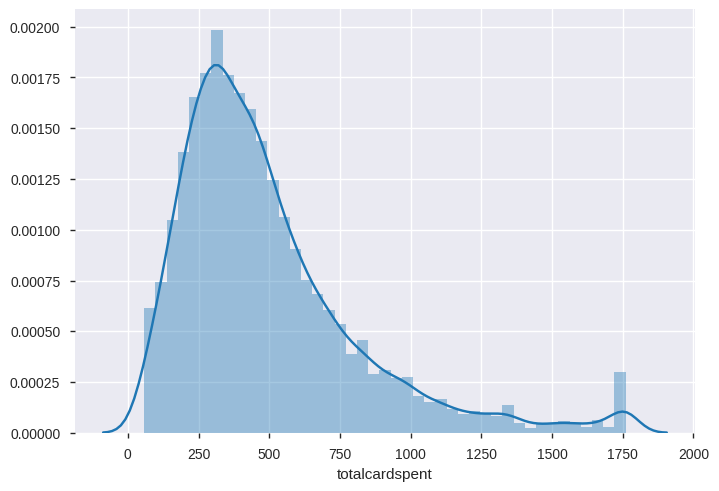

In [0]:
import seaborn as sns
sns.distplot(credit_data_new.totalcardspent)

In [0]:
# totalcardspent doesn't follow normal distribution. Taking its log 
credit_data_new["ln_totalcardspent"]= np.log(credit_data_new["totalcardspent"])

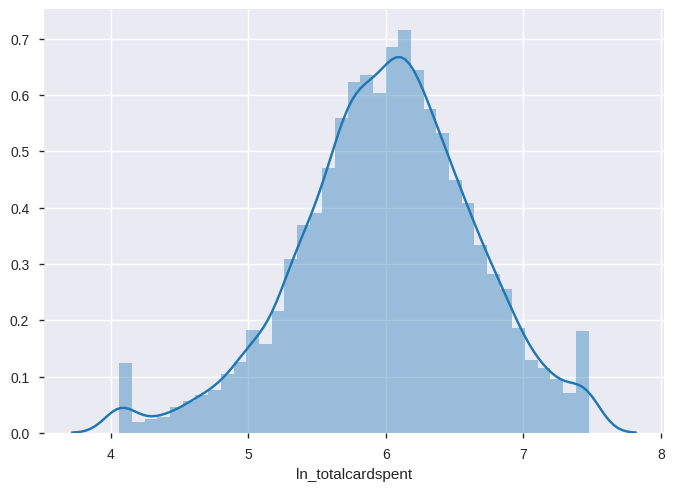

In [0]:
sns.distplot(credit_data_new.ln_totalcardspent)

In [0]:
# Droping totalcardspent
credit_data_new.drop(['totalcardspent'],axis=1,inplace=True)

In [0]:
# Droping log variables. These have corresponding normal variables
credit_data_new.drop(['lninc', 'lncreddebt', 'lnothdebt', 'lnlongmon', 'lnlongten'],axis=1, inplace=True)

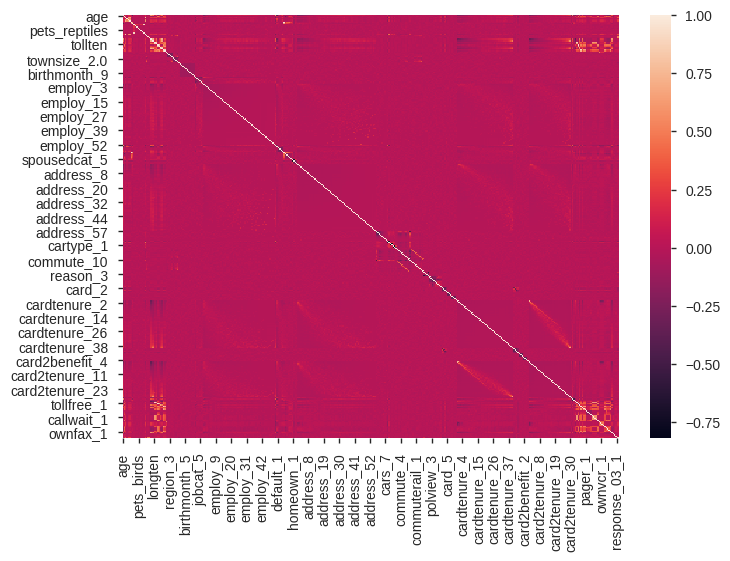

In [0]:
sns.heatmap(credit_data_new.corr())

# Feature Selection

## Selecting features using Correlation matrix

In [0]:
# correlation matrix (ranges from 1 to -1)
feature_cols_list = credit_data_new.corr().iloc[-1,:].abs().sort_values(ascending=False)
feature_cols_list

ln_totalcardspent    1.000000
card2items           0.521198
carditems            0.501884
income               0.355851
carvalue             0.306784
                       ...   
cardtenure_36        0.000117
townsize_4.0         0.000112
card2tenure_24       0.000091
birthmonth_10        0.000069
employ_46            0.000069
Name: ln_totalcardspent, Length: 354, dtype: float64

In [0]:
top_feature_cols_list = feature_cols_list.head(41).index.tolist()
top_feature_cols_list

['ln_totalcardspent',
 'card2items',
 'carditems',
 'income',
 'carvalue',
 'othdebt',
 'creddebt',
 'retire_1',
 'owndvd_1',
 'carown_0',
 'ownvcr_1',
 'reason_2',
 'owncd_1',
 'carown_1',
 'card_2',
 'card_3',
 'ed',
 'wireten',
 'wiremon',
 'card2_3',
 'tollten',
 'owntv_1',
 'equipten',
 'gender_1',
 'card2_2',
 'jobcat_2',
 'tollmon',
 'wireless_1',
 'card_4',
 'equipmon',
 'ownpda_1',
 'homeown_1',
 'hometype_2',
 'ownfax_1',
 'response_03_1',
 'card2_4',
 'pager_1',
 'callwait_1',
 'vote_1',
 'internet_4',
 'callid_1']

In [0]:
credit_data_final = credit_data_new[top_feature_cols_list]
credit_data_final.head()

,ln_totalcardspent,card2items,carditems,income,carvalue,othdebt,creddebt,retire_1,owndvd_1,carown_0,ownvcr_1,reason_2,owncd_1,carown_1,card_2,card_3,ed,wireten,wiremon,card2_3,tollten,owntv_1,equipten,gender_1,card2_2,jobcat_2,tollmon,wireless_1,card_4,equipmon,ownpda_1,homeown_1,hometype_2,ownfax_1,response_03_1,card2_4,pager_1,callwait_1,vote_1,internet_4,callid_1
0,5.007029,4,5,31.0,14.3,2.240091,1.200909,0,1,0,1,0,0,1,0,1,15,0.00,0.00,0,161.05,1,126.1,1,0,0,29.0,0,0,29.50,0,0,1,0,0,0,1,1,1,0,0
1,4.350794,2,5,15.0,6.8,1.567980,1.222020,0,1,0,1,0,1,1,1,0,17,1683.55,45.65,0,0.00,1,1975.0,0,0,1,0.0,1,0,54.85,1,1,0,1,0,1,1,0,0,1,1
2,5.886021,7,9,35.0,18.8,2.536380,0.928620,0,1,0,1,1,1,1,1,0,14,0.00,0.00,0,0.00,1,0.0,1,0,1,0.0,0,0,0.00,0,1,0,0,0,1,0,0,0,0,0
3,5.884464,1,17,20.0,8.7,1.117200,0.033160,0,1,0,1,0,1,1,1,0,16,0.00,0.00,1,0.00,1,0.0,0,0,1,0.0,0,0,0.00,0,1,0,0,0,0,0,0,0,0,0
4,6.230147,7,8,23.0,10.6,0.176341,0.214659,0,1,1,1,0,1,0,0,0,16,410.80,19.05,0,387.70,1,0.0,0,0,1,16.5,1,1,0.00,0,0,1,0,0,0,0,1,0,0,1


## Selecting Features by VIF method.
Calculate VIF and drop variable one by one with VIF > 10

In [0]:
all_columns = "+".join(top_feature_cols_list)

my_formula = "ln_totalcardspent~" + all_columns

print(my_formula)

ln_totalcardspent~ln_totalcardspent+card2items+carditems+income+carvalue+othdebt+creddebt+retire_1+owndvd_1+carown_0+ownvcr_1+reason_2+owncd_1+carown_1+card_2+card_3+ed+wireten+wiremon+card2_3+tollten+owntv_1+equipten+gender_1+card2_2+jobcat_2+tollmon+wireless_1+card_4+equipmon+ownpda_1+homeown_1+hometype_2+ownfax_1+response_03_1+card2_4+pager_1+callwait_1+vote_1+internet_4+callid_1


In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [0]:
# get y and X dataframes based on this regression
y, X = dmatrices('ln_totalcardspent~card2items+carditems+income+carvalue+othdebt+creddebt+retire_1+owndvd_1+carown_0+ownvcr_1+reason_2+owncd_1+carown_1+card_2+card_3+ed+wireten+wiremon+card2_3+tollten+owntv_1+equipten+gender_1+card2_2+jobcat_2+tollmon+wireless_1+card_4+equipmon+ownpda_1+homeown_1+hometype_2+ownfax_1+response_03_1+card2_4+pager_1+callwait_1+vote_1+internet_4+callid_1-1'
                 , credit_data_final, return_type='dataframe')

In [0]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

while (1):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    max_vif=vif['VIF Factor'].max()
    max_vif_coeff=vif.loc[vif['VIF Factor'].idxmax()]['features']

    if max_vif > 10.00:
        print("Dropping ", max_vif_coeff ," as its VIF "+ str(max_vif) + " > 10.00 and re-calculate VIF")
        X.drop(max_vif_coeff,axis=1,inplace=True)
        credit_data_final.drop(max_vif_coeff,axis=1,inplace=True)
        
    else:
        break
vif.round(1)

Dropping  owntv_1  as its VIF 52.28285124350308 > 10.00 and re-calculate VIF


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Dropping  wiremon  as its VIF 29.723279110398448 > 10.00 and re-calculate VIF
Dropping  ed  as its VIF 23.368510811975085 > 10.00 and re-calculate VIF
Dropping  owncd_1  as its VIF 20.598806786154388 > 10.00 and re-calculate VIF
Dropping  ownvcr_1  as its VIF 14.974124551926238 > 10.00 and re-calculate VIF
Dropping  tollmon  as its VIF 14.07005095831549 > 10.00 and re-calculate VIF
Dropping  income  as its VIF 13.901554281353953 > 10.00 and re-calculate VIF
Dropping  owndvd_1  as its VIF 10.3468437404293 > 10.00 and re-calculate VIF


,VIF Factor,features
0,4.3,card2items
1,8.3,carditems
2,5.2,carvalue
3,3.6,othdebt
4,2.8,creddebt
5,1.5,retire_1
6,2.7,carown_0
7,1.1,reason_2
8,9.4,carown_1
9,2.1,card_2


In [0]:
credit_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ln_totalcardspent  5000 non-null   float64
 1   card2items         5000 non-null   int64  
 2   carditems          5000 non-null   int64  
 3   carvalue           5000 non-null   float64
 4   othdebt            5000 non-null   float64
 5   creddebt           5000 non-null   float64
 6   retire_1           5000 non-null   uint8  
 7   carown_0           5000 non-null   uint8  
 8   reason_2           5000 non-null   uint8  
 9   carown_1           5000 non-null   uint8  
 10  card_2             5000 non-null   uint8  
 11  card_3             5000 non-null   uint8  
 12  wireten            5000 non-null   float64
 13  card2_3            5000 non-null   uint8  
 14  tollten            5000 non-null   float64
 15  equipten           5000 non-null   float64
 16  gender_1           5000 

## Feature selection through Recursive Feature Elimination Method

In [0]:
import statsmodels.api as sm

In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
#Splitting Dependent and Independent Features

feature_columns = credit_data_final.columns.difference(['ln_totalcardspent'])
feature_columns

Index(['callid_1', 'callwait_1', 'card2_2', 'card2_3', 'card2_4', 'card2items',
       'card_2', 'card_3', 'card_4', 'carditems', 'carown_0', 'carown_1',
       'carvalue', 'creddebt', 'equipmon', 'equipten', 'gender_1', 'homeown_1',
       'hometype_2', 'internet_4', 'jobcat_2', 'othdebt', 'ownfax_1',
       'ownpda_1', 'pager_1', 'reason_2', 'response_03_1', 'retire_1',
       'tollten', 'vote_1', 'wireless_1', 'wireten'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split( credit_data_final[feature_columns],
                                                  credit_data_final['ln_totalcardspent'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

train_X = sm.add_constant(train_X)
test_X = sm.add_constant(test_X)

In [0]:
print( len( train_X ))
print( len( test_X))

3500
1500


In [0]:
lm=sm.OLS(train_Y,train_X).fit()

while (1):
    lm=sm.OLS(train_Y,train_X).fit()
    
    df = pd.DataFrame(lm.pvalues)
    df.reset_index(inplace=True)
    df.columns = ['coeff', 'pvalue']

    max_pvalue=df['pvalue'].max()
    max_pvalue_coeff=df.loc[df['pvalue'].idxmax()]['coeff']

    if max_pvalue > 0.05:
        print("Dropping ", max_pvalue_coeff ," as its P-Value " + str(max_pvalue) + " > 5% and rebuild the model")
        train_X.drop(max_pvalue_coeff,axis=1,inplace=True)
        test_X.drop(max_pvalue_coeff,axis=1,inplace=True)
        
    else:
        break
lm.summary()

Dropping  callwait_1  as its P-Value 0.9840997224802852 > 5% and rebuild the model
Dropping  pager_1  as its P-Value 0.9578664535787582 > 5% and rebuild the model
Dropping  ownfax_1  as its P-Value 0.6259079516775637 > 5% and rebuild the model
Dropping  wireten  as its P-Value 0.5786924682070899 > 5% and rebuild the model
Dropping  homeown_1  as its P-Value 0.5553107078243257 > 5% and rebuild the model
Dropping  callid_1  as its P-Value 0.5308307128369051 > 5% and rebuild the model
Dropping  wireless_1  as its P-Value 0.4997102878667632 > 5% and rebuild the model
Dropping  jobcat_2  as its P-Value 0.366957975534408 > 5% and rebuild the model
Dropping  hometype_2  as its P-Value 0.3015046286827565 > 5% and rebuild the model
Dropping  equipmon  as its P-Value 0.27267837217507535 > 5% and rebuild the model
Dropping  internet_4  as its P-Value 0.4007255910061376 > 5% and rebuild the model
Dropping  vote_1  as its P-Value 0.1999974608654396 > 5% and rebuild the model
Dropping  response_03_1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_totalcardspent   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     389.2
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:55:12   Log-Likelihood:                -1562.2
No. Observations:                3500   AIC:                             3162.
Df Residuals:                    3481   BIC:                             3279.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0551      0.039    130.318      0.000       4.979       5.131
card2_2       -0.1954      0.019    -10.228      0.000      -0.233      -0.158
card2_3       -0.1980      0.019    -10.472      0.000      -0.235      -0.161
card2_4       -0.1744      0.020     -8.533      0.000      -0.214      -0.134
card2items     0.1095      0.003     41.548      0.000       0.104       0.115
card_2        -0.3744      0.020    -19.081      0.000      -0.413      -0.336
card_3        -0.3908      0.020    -19.786      0.000      -0.430      -0.352
card_4        -0.4099      0.020    -20.574      0.000      -0.449      -0.371
carditems      0.0829      0.002     43.057      0.000       0.079       0.087
carown_0      -0.2131      0.028     -7.651      0.000      -0.268      -0.159
carown_1      -0.1680      0.025     -6.753      0.000      -0.217      -0.119
carvalue       0.0070      0.000     15.236      0.000       0.006       0.008
creddebt       0.0132      0.004      3.647      0.000       0.006       0.020
equipten    2.595e-05   7.86e-06      3.301      0.001    1.05e-05    4.14e-05
gender_1      -0.0514      0.013     -3.991      0.000      -0.077      -0.026
othdebt        0.0049      0.002      2.225      0.026       0.001       0.009
ownpda_1       0.0379      0.018      2.162      0.031       0.004       0.072
reason_2       0.2499      0.026      9.493      0.000       0.198       0.302
retire_1      -0.1412      0.019     -7.256      0.000      -0.179      -0.103
==============================================================================
Omnibus:                       39.281   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.339
Skew:                           0.257   Prob(JB):                     1.74e-09
Kurtosis:                       3.113   Cond. No.                     7.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
feature_columns = train_X.columns
feature_columns

Index(['const', 'card2_2', 'card2_3', 'card2_4', 'card2items', 'card_2',
       'card_3', 'card_4', 'carditems', 'carown_0', 'carown_1', 'carvalue',
       'creddebt', 'equipten', 'gender_1', 'othdebt', 'ownpda_1', 'reason_2',
       'retire_1'],
      dtype='object')

# Explore different regression models and determine the best model for the prediction

## Linear Regression

In [0]:
lm=sm.OLS(train_Y,train_X).fit()

In [0]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_totalcardspent   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     389.2
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:55:22   Log-Likelihood:                -1562.2
No. Observations:                3500   AIC:                             3162.
Df Residuals:                    3481   BIC:                             3279.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0551      0.039    130.318      0.000       4.979       5.131
card2_2       -0.1954      0.019    -10.228      0.000      -0.233      -0.158
card2_3       -0.1980      0.019    -10.472      0.000      -0.235      -0.161
card2_4       -0.1744      0.020     -8.533      0.000      -0.214      -0.134
card2items     0.1095      0.003     41.548      0.000       0.104       0.115
card_2        -0.3744      0.020    -19.081      0.000      -0.413      -0.336
card_3        -0.3908      0.020    -19.786      0.000      -0.430      -0.352
card_4        -0.4099      0.020    -20.574      0.000      -0.449      -0.371
carditems      0.0829      0.002     43.057      0.000       0.079       0.087
carown_0      -0.2131      0.028     -7.651      0.000      -0.268      -0.159
carown_1      -0.1680      0.025     -6.753      0.000      -0.217      -0.119
carvalue       0.0070      0.000     15.236      0.000       0.006       0.008
creddebt       0.0132      0.004      3.647      0.000       0.006       0.020
equipten    2.595e-05   7.86e-06      3.301      0.001    1.05e-05    4.14e-05
gender_1      -0.0514      0.013     -3.991      0.000      -0.077      -0.026
othdebt        0.0049      0.002      2.225      0.026       0.001       0.009
ownpda_1       0.0379      0.018      2.162      0.031       0.004       0.072
reason_2       0.2499      0.026      9.493      0.000       0.198       0.302
retire_1      -0.1412      0.019     -7.256      0.000      -0.179      -0.103
==============================================================================
Omnibus:                       39.281   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.339
Skew:                           0.257   Prob(JB):                     1.74e-09
Kurtosis:                       3.113   Cond. No.                     7.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
lm.rsquared_adj

0.6663333803923208

None of the feature has P value > 5%

In [0]:
y_pred_train = lm.predict(train_X)

rmse_train = np.sqrt( metrics.mean_squared_error( train_Y, y_pred_train) )
print("rmse_train = " + str(rmse_train))
print("r2 score train = " + str(metrics.r2_score( train_Y, y_pred_train )))

rmse_train = 0.37810095445136155
r2 score train = 0.66804987057607


In [0]:
test_X = sm.add_constant(test_X)
y_pred_test = lm.predict(test_X)

rmse_test = np.sqrt( metrics.mean_squared_error( test_Y, y_pred_test) )
print("rmse_test = " + str(rmse_test))
linear_regression_score = metrics.r2_score( test_Y, y_pred_test )
print("linear_regression_score = " + str(linear_regression_score))

rmse_test = 0.3799624244995206
linear_regression_score = 0.620407041634988


In [0]:
print("MAPE train = " + str(mean_absolute_percentage_error(train_Y, y_pred_train)))
print("MAPE test = " + str(mean_absolute_percentage_error(test_Y, y_pred_test)))      

MAPE train = 5.0755675273559735
MAPE test = 4.984571686551832


The model is Optimal Fitting as RMSE Test ~= RMSE Training

In [0]:
residuals = test_Y - y_pred_test

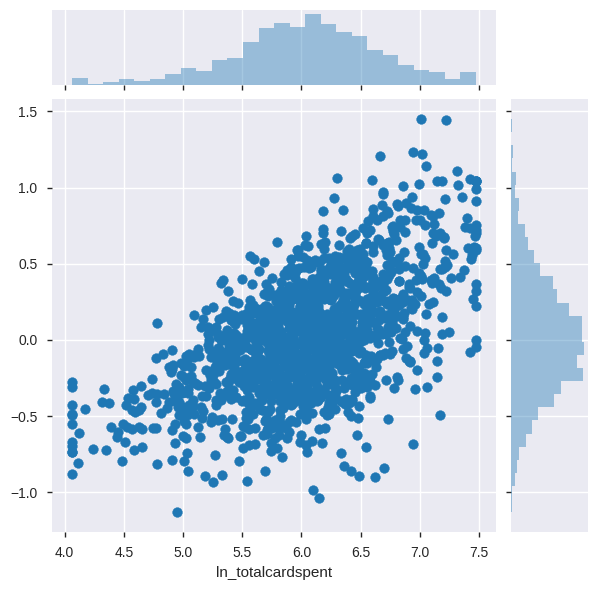

In [0]:
sns.jointplot(  test_Y, residuals )

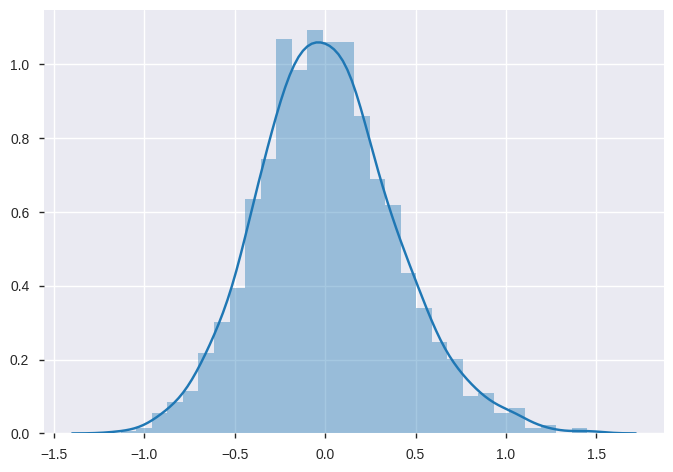

In [0]:
sns.distplot( residuals )

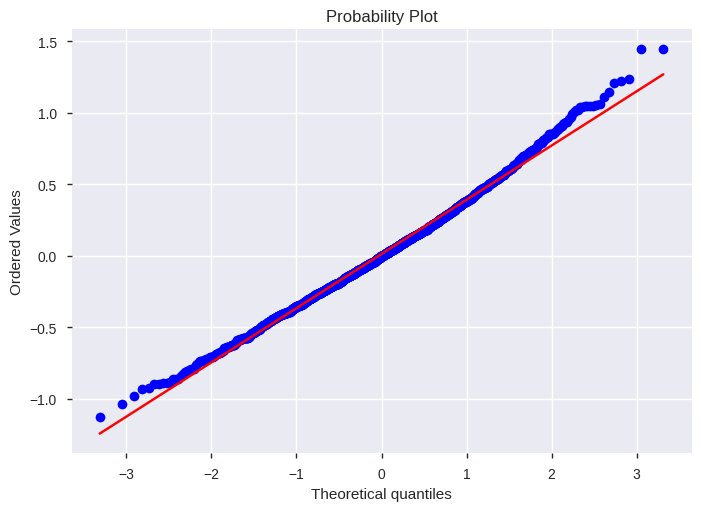

In [0]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()

The residuals are randomly distributed. There are no visible relationship. The model can be assumed to be correct

In [0]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      ln_totalcardspent   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     389.2
Date:                Tue, 28 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:55:45   Log-Likelihood:                -1562.2
No. Observations:                3500   AIC:                             3162.
Df Residuals:                    3481   BIC:                             3279.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0551      0.039    130.318      0.000       4.979       5.131
card2_2       -0.1954      0.019    -10.228      0.000      -0.233      -0.158
card2_3       -0.1980      0.019    -10.472      0.000      -0.235      -0.161
card2_4       -0.1744      0.020     -8.533      0.000      -0.214      -0.134
card2items     0.1095      0.003     41.548      0.000       0.104       0.115
card_2        -0.3744      0.020    -19.081      0.000      -0.413      -0.336
card_3        -0.3908      0.020    -19.786      0.000      -0.430      -0.352
card_4        -0.4099      0.020    -20.574      0.000      -0.449      -0.371
carditems      0.0829      0.002     43.057      0.000       0.079       0.087
carown_0      -0.2131      0.028     -7.651      0.000      -0.268      -0.159
carown_1      -0.1680      0.025     -6.753      0.000      -0.217      -0.119
carvalue       0.0070      0.000     15.236      0.000       0.006       0.008
creddebt       0.0132      0.004      3.647      0.000       0.006       0.020
equipten    2.595e-05   7.86e-06      3.301      0.001    1.05e-05    4.14e-05
gender_1      -0.0514      0.013     -3.991      0.000      -0.077      -0.026
othdebt        0.0049      0.002      2.225      0.026       0.001       0.009
ownpda_1       0.0379      0.018      2.162      0.031       0.004       0.072
reason_2       0.2499      0.026      9.493      0.000       0.198       0.302
retire_1      -0.1412      0.019     -7.256      0.000      -0.179      -0.103
==============================================================================
Omnibus:                       39.281   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.339
Skew:                           0.257   Prob(JB):                     1.74e-09
Kurtosis:                       3.113   Cond. No.                     7.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
lm.params

const         5.055144
card2_2      -0.195403
card2_3      -0.198030
card2_4      -0.174404
card2items    0.109538
card_2       -0.374405
card_3       -0.390829
card_4       -0.409856
carditems     0.082875
carown_0     -0.213149
carown_1     -0.167989
carvalue      0.007039
creddebt      0.013227
equipten      0.000026
gender_1     -0.051359
othdebt       0.004907
ownpda_1      0.037946
reason_2      0.249899
retire_1     -0.141224
dtype: float64

## Ensemble Models

### Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import seaborn as sn

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
train_X.drop('const', axis=1, inplace=True)
test_X.drop('const', axis=1, inplace=True)

In [0]:
param_grid = {'max_depth': np.arange(3, 8) , 'max_features': np.arange(3,feature_columns.size) , 'min_samples_split': np.arange(30,40) }

In [0]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [0]:
# May take hours to execute
rf = GridSearchCV(RandomForestRegressor(oob_score=True,n_estimators=10, n_jobs=-1 ), 
                        param_grid, 
                        cv=10)
rf.fit(train_X, train_Y)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=-1,
                                             oob_score=True, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [0]:
rf.best_params_

{'max_depth': 7, 'max_features': 14, 'min_samples_split': 37}

In [0]:
radm_reg = RandomForestRegressor(oob_score=True,n_estimators=100, max_features=14, min_samples_split=37,max_depth=7)
radm_reg.fit( train_X, train_Y )

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features=14, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=37, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
radm_test_pred = pd.DataFrame( { 'actual':  test_Y,
                            'predicted': radm_reg.predict( test_X ) } )

In [0]:
radm_reg.score(train_X,train_Y)

0.6827591720753878

In [0]:
random_forest_score = radm_reg.score(test_X,test_Y)
random_forest_score

0.557802963474739

In [0]:
indices = np.argsort(radm_reg.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_reg.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,card2items,0.412145
1,2,carditems,0.372971
2,3,carvalue,0.129543
3,4,othdebt,0.031458
4,5,creddebt,0.025242
5,6,reason_2,0.007535
6,7,equipten,0.005761
7,8,retire_1,0.002810
8,9,card_4,0.002805
9,10,card_3,0.001823


In [0]:
radm_test_pred_cv = cross_val_predict(radm_reg, test_X, test_Y, cv=10 )

In [0]:
metrics.r2_score(test_Y, radm_test_pred_cv)

0.5402694416722359

In [0]:
radm_reg.oob_score_

0.6106151875590888

In [0]:
print("MAPE Random Forest train = " + str(mean_absolute_percentage_error(train_Y, radm_reg.predict(train_X))))
print("MAPE Random Forest test = " + str(mean_absolute_percentage_error(test_Y, radm_reg.predict(test_X))))  

MAPE Random Forest train = 4.912347272041181
MAPE Random Forest test = 5.373918838221408


In [0]:
rootMeanSquaredErrorRF=sqrt(mean_squared_error(test_Y, radm_reg.predict(test_X)))
rootMeanSquaredErrorRF

0.41009973659179744

### Decision Tree

In [0]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
param_grid = {'max_depth': np.arange(3, 8),
             'max_features': np.arange(3,feature_columns.size),
              'min_samples_split': np.arange(30,50)
             }

In [0]:
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv = 10)
tree.fit( train_X, train_Y )

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([3, 4, 5, 6, 7]),
                         'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 

In [0]:
tree.best_params_

{'max_depth': 6, 'max_features': 17, 'min_samples_split': 47}

In [0]:
reg_tree = DecisionTreeRegressor( max_depth = 6, max_features=17, min_samples_split=47 )
reg_tree.fit( train_X, train_Y )

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=17, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=47,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
tree_test_pred = pd.DataFrame( { 'actual':  test_Y,
                            'predicted': reg_tree.predict( test_X ) } )

In [0]:
tree_test_pred.sample( n = 10 )

,actual,predicted
251,4.878627,5.037048
276,5.855387,6.208873
3020,5.579503,5.529458
4752,6.635723,6.321121
4595,6.249183,6.715003
4196,6.933930,6.082827
2017,5.864937,5.982602
597,6.132856,6.506961
4633,6.721558,5.921292
506,6.630380,6.444314


In [0]:
decision_tree_score = reg_tree.score(test_X,test_Y)
decision_tree_score

0.46745149565642147

In [0]:
tree_test_pred_cv = cross_val_predict(reg_tree, test_X,test_Y, cv=10 )

In [0]:
metrics.r2_score(test_Y, tree_test_pred_cv)

0.4301601585401279

In [0]:
print("MAPE Decision Tree train = " + str(mean_absolute_percentage_error(train_Y, reg_tree.predict(train_X))))
print("MAPE Decision Tree test = " + str(mean_absolute_percentage_error(test_Y, reg_tree.predict(test_X))))  

MAPE Decision Tree train = 5.4567390789676224
MAPE Decision Tree test = 5.911594065249501


In [0]:
rootMeanSquaredErrorDT=sqrt(mean_squared_error(test_Y, reg_tree.predict(test_X)))
rootMeanSquaredErrorDT

0.45005040942188457

### Bagging

In [0]:
from sklearn.ensemble import BaggingRegressor

In [0]:
param_grid = {'max_features': np.arange(3,feature_columns.size)
             }

In [0]:
bag_reg = GridSearchCV(BaggingRegressor(), param_grid, cv = 10)
bag_reg.fit( train_X, train_Y )

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
bag_reg.best_params_

{'max_features': 17}

In [0]:
bag_reg = BaggingRegressor(oob_score=True, n_estimators=100, max_features = 17)
bag_reg.fit(train_X, train_Y)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=17, max_samples=1.0, n_estimators=100,
                 n_jobs=None, oob_score=True, random_state=None, verbose=0,
                 warm_start=False)

In [0]:
y_pred = pd.DataFrame( { 'actual':  test_Y,
                            'predicted': bag_reg.predict( test_X) } )

In [0]:
bagging_score = bag_reg.score(test_X,test_Y)
bagging_score

0.5727536943630805

In [0]:
bag_test_pred_cv = cross_val_predict(bag_reg, test_X,test_Y, cv=10 )

In [0]:
metrics.r2_score(test_Y, bag_test_pred_cv)

0.5584227060467899

In [0]:
print("MAPE Bagging train = " + str(mean_absolute_percentage_error(train_Y, bag_reg.predict(train_X))))
print("MAPE Bagging test = " + str(mean_absolute_percentage_error(test_Y, bag_reg.predict(test_X))))  

MAPE Bagging train = 1.9793476152213982
MAPE Bagging test = 5.291129474254791


In [0]:
rootMeanSquaredErrorBag=np.sqrt(mean_squared_error(train_Y, bag_reg.predict(train_X)))
print("rmse_train Bagging= " + str(rootMeanSquaredErrorBag))

rmse_train Bagging= 0.15087428421508906


In [0]:
rootMeanSquaredErrorBag=np.sqrt(mean_squared_error(test_Y, bag_reg.predict(test_X)))
print("rmse_test Bagging= " + str(rootMeanSquaredErrorBag))

rmse_test Bagging= 0.4031073663816051


## KNN (K-Nearest Neighbours) Regressor

In [0]:
from sklearn.neighbors import KNeighborsRegressor

### Fine Tuning Parameters

In [0]:
param_grid = {'n_neighbors': np.arange(1, 20)}

In [0]:
knn_gs = GridSearchCV(KNeighborsRegressor(), param_grid, cv = 10, n_jobs=-1)
knn_gs.fit( train_X, train_Y )

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
knn_gs.best_params_

{'n_neighbors': 11}

In [0]:
knn_reg = KNeighborsRegressor(n_neighbors=11)
knn_reg.fit(train_X, train_Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [0]:
y_pred = pd.DataFrame( { 'actual':  test_Y,
                            'predicted': knn_reg.predict( test_X) } )

In [0]:
knn_score = knn_reg.score(test_X,test_Y)
knn_score

0.35320353554600603

In [0]:
knn_test_pred_cv = cross_val_predict(knn_reg, test_X,test_Y, cv=10 )

In [0]:
metrics.r2_score(test_Y, knn_test_pred_cv)

0.2884176993369413

In [0]:
print("MAPE KNN train = " + str(mean_absolute_percentage_error(train_Y, knn_reg.predict(train_X))))
print("MAPE KNN test = " + str(mean_absolute_percentage_error(test_Y, knn_reg.predict(test_X))))  

MAPE KNN train = 6.097867717251321
MAPE KNN test = 6.398527275821955


In [0]:
rootMeanSquaredErrorKNN=np.sqrt(mean_squared_error(train_Y, knn_reg.predict(train_X)))
print("rmse_train KNN = " + str(rootMeanSquaredErrorKNN))

rmse_train KNN = 0.46427190698565834


In [0]:
rootMeanSquaredErrorKNN=np.sqrt(mean_squared_error(test_Y, knn_reg.predict(test_X)))
print("rmse_test KNN= " + str(rootMeanSquaredErrorKNN))

rmse_test KNN= 0.4959814056749813


# Comparing scores of different regression models and determine the best model for the prediction

In [0]:
print("Linear Regression Model  = " + str(linear_regression_score))
print("Random Forest Model Score = " + str(random_forest_score))
print("Decision Tree Model Score = " + str(decision_tree_score))
print("Bagging Model Score= " + str(bagging_score))
print("KNN Model Score= " + str(knn_score))

Linear Regression Model  = 0.620407041634988
Random Forest Model Score = 0.557802963474739
Decision Tree Model Score = 0.46745149565642147
Bagging Model Score= 0.5727536943630805
KNN Model Score= 0.35320353554600603


Linear Regression model has the best score of all the regression models used

# Using Linear Regression Model to Predict for Entire Dataset

Parameters for Linear Regression Model

In [0]:
lm.params

const         5.055144
card2_2      -0.195403
card2_3      -0.198030
card2_4      -0.174404
card2items    0.109538
card_2       -0.374405
card_3       -0.390829
card_4       -0.409856
carditems     0.082875
carown_0     -0.213149
carown_1     -0.167989
carvalue      0.007039
creddebt      0.013227
equipten      0.000026
gender_1     -0.051359
othdebt       0.004907
ownpda_1      0.037946
reason_2      0.249899
retire_1     -0.141224
dtype: float64

In [0]:
feature_columns

Index(['const', 'card2_2', 'card2_3', 'card2_4', 'card2items', 'card_2',
       'card_3', 'card_4', 'carditems', 'carown_0', 'carown_1', 'carvalue',
       'creddebt', 'equipten', 'gender_1', 'othdebt', 'ownpda_1', 'reason_2',
       'retire_1'],
      dtype='object')

In [0]:
credit_data_final.columns

Index(['ln_totalcardspent', 'card2items', 'carditems', 'carvalue', 'othdebt',
       'creddebt', 'retire_1', 'carown_0', 'reason_2', 'carown_1', 'card_2',
       'card_3', 'wireten', 'card2_3', 'tollten', 'equipten', 'gender_1',
       'card2_2', 'jobcat_2', 'wireless_1', 'card_4', 'equipmon', 'ownpda_1',
       'homeown_1', 'hometype_2', 'ownfax_1', 'response_03_1', 'card2_4',
       'pager_1', 'callwait_1', 'vote_1', 'internet_4', 'callid_1'],
      dtype='object')

In [0]:
X = credit_data_final[train_X.columns]
Y = credit_data_final['ln_totalcardspent']

In [0]:
X = sm.add_constant(X)

In [0]:
Y_Pred = lm.predict(X)

In [0]:
credit_user_data['ln_totalcardspent_pred'] = Y_Pred

In [0]:
credit_user_data.head()

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,...,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,totalcardspent,ln_totalcardspent_pred
0,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,...,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46,5.428301
1,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,...,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0,77.54,5.132710
2,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,...,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0,359.97,6.206590
3,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,...,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0,359.41,5.900296
4,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,...,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0,507.83,5.940224


In [0]:
credit_user_data['totalcardspent_pred'] = np.exp(credit_user_data['ln_totalcardspent_pred'])

In [0]:
credit_user_data.head()

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,...,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,totalcardspent,ln_totalcardspent_pred,totalcardspent_pred
0,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,...,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0,149.46,5.428301,227.761938
1,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,...,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0,77.54,5.132710,169.475823
2,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,...,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0,359.97,6.206590,496.007176
3,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,...,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0,359.41,5.900296,365.145712
4,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,...,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0,507.83,5.940224,380.019899


Exporting Predicted Dataset into Excel format

In [0]:
credit_user_data.to_excel("CREDIT_CARD_USERS_DATA-Predicted.xlsx")